In [88]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [45]:
lg=pd.read_csv("E:/datasets/LungCapData.csv")

In [46]:
lg.isnull().sum()

LungCap      0
Age          0
Height       0
Smoke        0
Gender       0
Caesarean    0
dtype: int64

In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [48]:
lg.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


In [49]:
lg.Gender=le.fit_transform(lg.Gender)
lg.Smoke=le.fit_transform(lg.Smoke)
lg.Caesarean=le.fit_transform(lg.Caesarean)

In [50]:
lg.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,0,1,0
1,10.125,18,74.7,1,0,0
2,9.550,16,69.7,0,0,1
3,11.125,14,71.0,0,1,0
4,4.800,5,56.9,0,1,0


In [51]:
lg.corr()

,LungCap,Age,Height,Smoke,Gender,Caesarean
LungCap,1.000000,0.819675,0.912187,0.101374,0.169823,0.021317
Age,0.819675,1.000000,0.835737,0.211232,-0.030312,0.056339
Height,0.912187,0.835737,1.000000,0.176534,0.141441,0.060397
Smoke,0.101374,0.211232,0.176534,1.000000,-0.053528,0.038330
Gender,0.169823,-0.030312,0.141441,-0.053528,1.000000,0.013070
Caesarean,0.021317,0.056339,0.060397,0.038330,0.013070,1.000000


In [52]:
from sklearn.model_selection import train_test_split

In [53]:
## Apply Sampling
lg_train,lg_test=train_test_split(lg,test_size=0.2)

In [54]:
lg_train_x=lg_train.iloc[:,1:6]
lg_train_y=lg_train.iloc[:,0]

In [55]:
lg_test_x=lg_test.iloc[:,1:6]
lg_test_y=lg_test.iloc[:,0]

In [56]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [57]:
### Apply model of Linear Regression
lr.fit(lg_train_x, lg_train_y)

LinearRegression()

In [58]:
lg_train_y.head()

11     10.925
708     6.900
552     9.025
623     7.675
509    12.050
Name: LungCap, dtype: float64

In [61]:
rsquare=lr.score(lg_train_x,lg_train_y)

In [62]:
rsquare

0.8529828898197322

In [63]:
lr.coef_

array([ 0.16909425,  0.2624155 , -0.66210161,  0.4273841 , -0.15001123])

In [65]:
lg_train_x.columns

Index(['Age', 'Height', 'Smoke', 'Gender', 'Caesarean'], dtype='object')

In [68]:
# Cal Rsquare
Rsuqare=lr.score(lg_train_x,lg_train_y)


In [69]:
N=lg_train_x.shape[0]
K=lg_train_x.shape[1]

In [72]:
# Cal Adjusted Rsquare
AdjRsquare=1-(1-Rsuqare)*(N-1)/(N-K-1)
AdjRsquare

0.8517022529714721

In [74]:
### Predict function on train & test data of X
pred_train=lr.predict(lg_train_x)
pred_test=lr.predict(lg_test_x)

In [80]:
len(pred_train)
lg_train_x.shape

(580, 5)

In [76]:
pred_test

array([ 7.44386652,  7.03564668,  7.22111517,  1.91870611, 10.77815936,
        6.35926968,  8.30866367,  9.19194018,  7.04906928,  6.09568018,
        1.47555141,  8.27526359,  7.27359827,  9.38837164,  9.70520746,
       10.68483811,  7.40185438, 10.6540289 , 10.42379781,  9.06671696,
        2.08780036,  6.44357641,  5.79396131,  7.73583599,  2.56014825,
       10.51271097, 13.30899309,  9.68013991,  8.46611297, 11.62347103,
        9.92104315,  3.39870385,  9.41772441,  7.27359827,  3.5532015 ,
        7.79665162,  7.65262492, 10.98057245,  5.75571403,  9.37983791,
       11.17885989,  8.09157274,  3.16665554,  5.86516665,  7.58554523,
        6.48752578, 11.52869335,  7.39020942, 10.3537269 , 11.01728495,
        7.70207513,  4.55155439,  7.72123939, 10.14836216, 11.1484927 ,
        7.49028675, 12.09023685,  9.52446826,  9.44574361,  7.02282773,
        9.24567852,  2.76595501,  9.25040781,  9.7910094 ,  7.12476104,
       10.46022787,  5.30803124,  3.94682475,  6.53099436,  5.38

In [82]:
error_train= lg_train_y - pred_train
error_test= lg_test_y - pred_test

In [83]:
##### Things to do to check the Assumption
import numpy as np


In [84]:
np.mean(error_train)

1.1025663141105003e-16

C:\Users\sunil\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LungCap', ylabel='Density'>

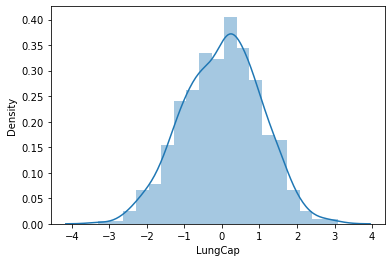

In [86]:
sns.distplot(error_train)  #### error tersm are normally distributed

In [93]:
import matplotlib.pyplot as plt


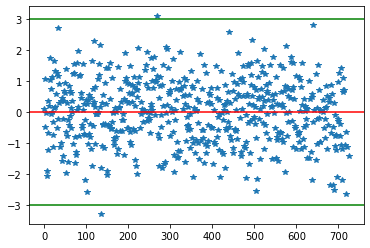

In [96]:
plt.plot(error_train, "*")
plt.axhline(y=np.mean(error_train),color="r")
plt.axhline(y=3,color="g")
plt.axhline(y=-3,color="g")

In [99]:
pred_actual=pd.DataFrame({"Predicted":pred_train, "Actual":lg_train_y})

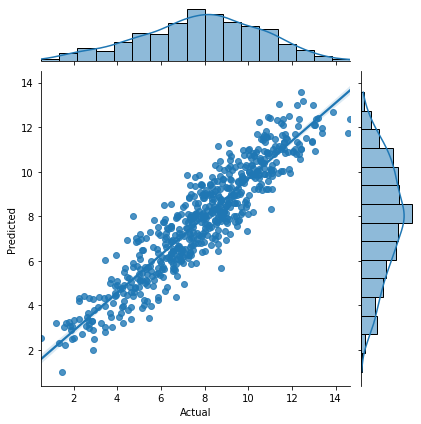

In [100]:
sns.jointplot(x="Actual",y="Predicted",data=pred_actual,kind='reg')

In [106]:
### Lets us find MSE,RMSE,MAPE,Accuracy

MSE_test=np.mean(np.square(error_test))
MSE_test

0.9282811358858181

In [107]:
RMSE_test=np.sqrt(MSE_test)
RMSE_test

0.9634734744069595

In [108]:
MAPE_test=np.mean(np.abs(error_test)*100/lg_test_y)
MAPE_test

11.610520073103938

In [109]:
Accuracy=100-MAPE_test
Accuracy

88.38947992689606